## Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

In [ ]:
model = LinearRegression()

In [ ]:
X = np.ones((200,3))

X[:,1]*=np.random.normal(0,1,(200,))
X[:,2]*=np.random.normal(0,1,(200,))

In [ ]:
y = X @ np.array([50,14,-7]) + np.random.normal(0,5,(200,))
y.shape

(200,)

In [ ]:
model.fit(X[:,[1,2]], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coefs = model.coef_
coefs

array([13.96513979, -6.12029608])

In [ ]:
const = model.intercept_
const

49.988527192464055

In [ ]:
np.linalg.inv(X.T @ X) @ X.T @ y

array([49.98852719, 13.96513979, -6.12029608])

In [ ]:
import plotly.express as px
import plotly.graph_objects as go



fig = px.scatter_3d(np.concatenate((X,y.reshape(-1,1)), axis=1),  x=1, y=2, z=3,
                    size_max=5, opacity=0.5, color_discrete_sequence=['red'])

# tight layout
fig.update_layout(margin=dict(l=10, r=100, b=100, t=10))

x1 = np.linspace(-3, 3, 30)
y1 = np.linspace(-3, 3, 30)
xx, yy = np.meshgrid(x1, y1)
z = np.c_[xx.ravel(), yy.ravel()] @ np.array(coefs) + const

# transpose
z = z.reshape(xx.shape)
fig.add_traces(go.Surface(x=x1, y=y1, z=z, showscale=False,
                          opacity=0.3, colorscale=[[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']]))
fig.show()

In [ ]:
def f(x):
    return 3 * x ** 3 - 2 * x**2 + x

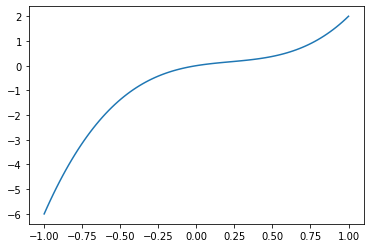

In [ ]:
x100 = np.linspace(-1, 1, 100)
plt.plot(x100, f(x100))
plt.show()

In [ ]:
x = np.linspace(-1, 1, 10)  # 10 точек на отрезке [-1, 1]
y = f(x)
coefs = np.polyfit(x, y, deg = 2)
coefs

array([-2.00000000e+00,  3.17037037e+00, -9.55004142e-16])

In [ ]:
poly = np.poly1d(coefs)
poly(0), poly(1), poly(2)

(-9.550041418833999e-16, 1.1703703703703716, -1.6592592592592554)

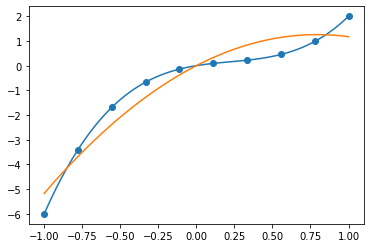

In [ ]:
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

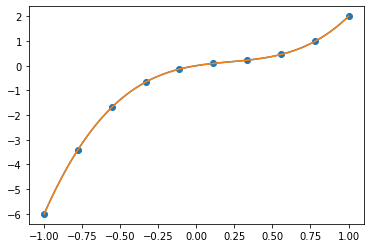

In [ ]:
coefs = np.polyfit(x, y, deg = 3)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

In [ ]:
def f_real(x):
    return 3 * x ** 3 - 2 * x**2 + x + np.random.normal(0, 0.5, x.shape)

In [ ]:
x.shape

(10,)

In [ ]:
x = np.linspace(-1, 1, 10)
y = f_real(x) # + np.random.normal(0, 0.5, 10)  # случайный шум

In [ ]:
x100 = np.linspace(-1, 1, 100)

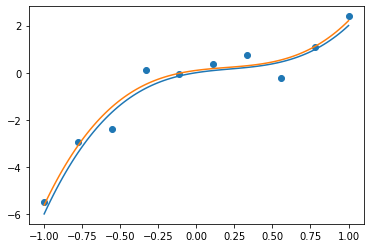

In [ ]:
coefs = np.polyfit(x, y, deg = 3)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

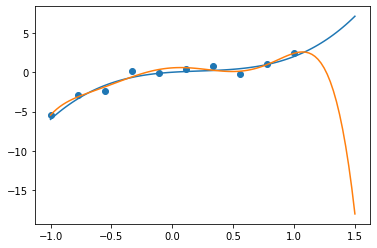

In [ ]:
# Место для решения
x100 = np.linspace(-1, 1.5, 100)
coefs = np.polyfit(x, y, deg = 6)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))
plt.show()

In [ ]:
# возьмем 10 случайных точек от 0 до 1
x_test = np.random.random(10)

# превратим их в 10 случайных точек от -1 до 1
x_test = 2 * x_test - 1
x_test

array([ 0.87549256, -0.84961649,  0.7767826 ,  0.49725197, -0.66515157,
        0.02016336, -0.04402221,  0.95862025, -0.21140168, -0.85237046])

In [ ]:
# y_real - это np.array c реальными значениями в точках
# y_pred - это np.array c предсказанными нами значениями в точках
# они одной длины
def MSE(y_real, y_pred):
    return ((y_real - y_pred) ** 2).sum() / len(y_real)

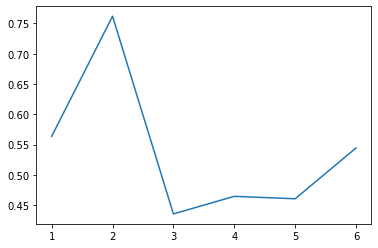

In [ ]:
np.random.seed(2)
errors = []
x = np.linspace(-1, 1, 10)
y = f_real(x)
degs = range(1, 7)
y_test = f_real(x_test)
for i in degs:
    coefs = np.polyfit(x, y, deg = i)
    poly = np.poly1d(coefs)
    errors.append(MSE(y_test, poly(x_test)))
plt.plot(degs, errors)


In [ ]:
def getMSE(deg):
    x100 = np.linspace(-1, 1.5, 100)
    coefs = np.polyfit(x, y, deg = deg)
    poly = np.poly1d(coefs)
    y_pred = poly(x_test)
    return MSE(y_test, y_pred)

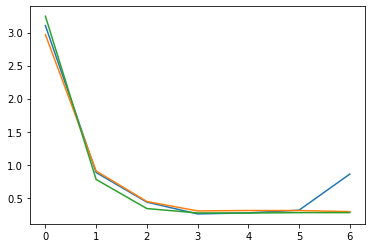

In [ ]:
# место для решения
x_test = np.random.random(10) * 2 - 1
x = np.linspace(-1, 1, 10)
y = f_real(x)
y_test = f_real(x_test)
degs = np.arange(0, 7)
errors = np.stack(np.vectorize(getMSE)(degs), axis=0)
plt.plot(degs, errors)
x = np.linspace(-1, 1, 30)
y = f_real(x)
errors = np.stack(np.vectorize(getMSE)(degs), axis=0)
plt.plot(degs, errors)
x = np.linspace(-1, 1, 40)
y = f_real(x)
errors = np.stack(np.vectorize(getMSE)(degs), axis=0)
plt.plot(degs, errors)

In [ ]:
X = np.linspace(-1, 1, 50)
y = f_real(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
X_train, y_train

(array([ 0.55102041, -0.71428571, -0.63265306,  0.75510204,  0.67346939,
        -0.30612245,  0.10204082, -0.95918367,  0.71428571, -0.10204082,
        -0.18367347, -0.79591837,  0.91836735, -1.        , -0.14285714,
        -0.06122449,  0.2244898 , -0.55102041, -0.02040816,  1.        ,
        -0.26530612, -0.87755102, -0.91836735,  0.14285714,  0.79591837,
         0.06122449,  0.46938776, -0.2244898 , -0.51020408, -0.46938776,
         0.83673469,  0.59183673,  0.18367347,  0.26530612,  0.3877551 ,
         0.34693878, -0.75510204, -0.3877551 , -0.42857143,  0.87755102,
         0.63265306,  0.42857143,  0.51020408, -0.67346939, -0.59183673]),
 array([ 1.31658774, -3.32486883, -3.07526968,  0.27901389,  1.15180757,
        -0.15644949, -0.13010305, -5.23049528,  0.55299888, -0.89939023,
        -0.97913982, -2.94419317,  1.80393216, -6.51070737, -0.31830688,
        -1.11073582,  0.45839631, -1.9092627 ,  1.61860605,  2.41056044,
        -0.2131333 , -4.2332253 , -5.09060371,  0

In [ ]:
X_test, y_test

(array([ 0.02040816, -0.34693878,  0.95918367,  0.30612245, -0.83673469]),
 array([ 0.50503134, -1.45418398,  3.82090616,  0.09063784, -3.59485109]))

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    print(test_index, train_index)

[0 1 2 3 4] [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[5 6 7 8 9] [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[10 11 12 13 14] [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[15 16 17 18 19] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[20 21 22 23 24] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[25 26 27 28 29] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[30 31 32 33 34] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

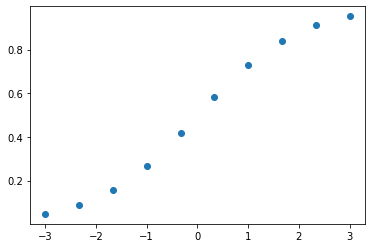

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

degs = range(1, 8)
x = np.linspace(-3, 3, 10)
plt.scatter(x, sigmoid(x))

In [ ]:
def degs_errors(degs, x, y, x_test=None, y_test=None):
    if x_test is None:
        x_test = x
    if y_test is None:
        y_test = y
    errors = []
    for deg in degs:
        coefs = np.polyfit(x, y, deg=deg)
        poly = np.poly1d(coefs)
        errors.append(MSE(poly(x_test), y_test))

    return errors

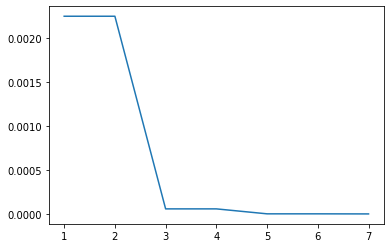

In [ ]:
x = np.linspace(-3, 3, 10)
y = sigmoid(x)
errors = degs_errors(degs, x, y)
plt.plot(degs, errors)



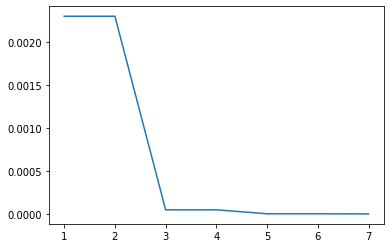

In [ ]:
x_test = np.random.random(10) * 6 - 3
y_test = sigmoid(x_test)
x = np.linspace(-3, 3, 10)
y = sigmoid(x)
errors = degs_errors(degs, x, y, x_test, y_test)
plt.plot(degs, errors)

In [ ]:
def real_sigmoid(x):
    np.random.seed(0)
    return sigmoid(x) + np.random.normal(0, 0.1, x.shape)

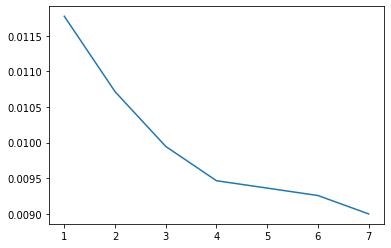

In [ ]:
x = np.linspace(-3, 3, 30)
y = real_sigmoid(x)
errors = degs_errors(degs, x, y)
plt.plot(degs, errors)

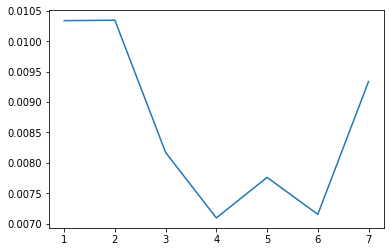

In [ ]:
x_test = np.random.random(10) * 6 - 3
y_test = sigmoid(x_test)
x = np.linspace(-3, 3, 10)
y = real_sigmoid(x)
errors = degs_errors(degs, x, y, x_test, y_test)
plt.plot(degs, errors)

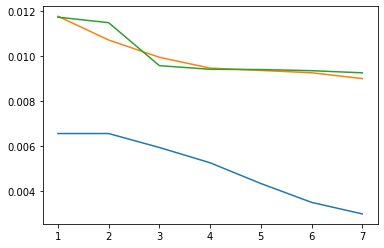

In [ ]:
train_sizes = [10, 30, 60]
for size in train_sizes:
    x = np.linspace(-3, 3, size)
    y = real_sigmoid(x)
    errors = degs_errors(degs, x, y)
    plt.plot(degs, errors)


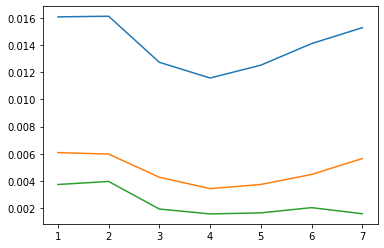

In [ ]:
x_test = np.random.random(10) * 6 - 3
y_test = sigmoid(x_test)
train_sizes = [10, 30, 60]
for size in train_sizes:
    x200 = np.linspace(-3, 3, 100)
    x = np.linspace(-3, 3, size)
    y = real_sigmoid(x)
    errors = degs_errors(degs, x, y, x_test, y_test)
    plt.plot(degs, errors)

In [ ]:
!gdown --id 13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb

Downloading...
From: https://drive.google.com/uc?id=13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb
To: /content/Advertising.csv
100% 5.17k/5.17k [00:00<00:00, 15.6MB/s]


In [ ]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
# Размеры датасета
data.shape

(200, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


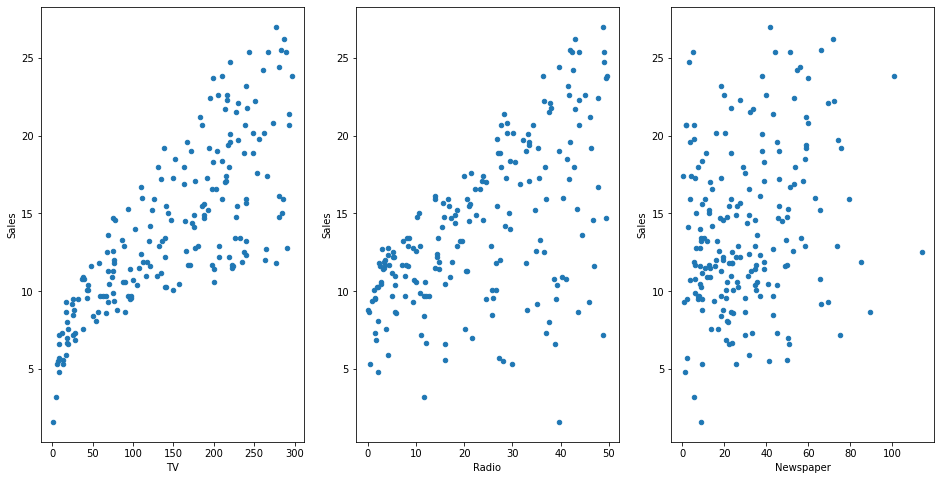

In [ ]:
fig, axs = plt.subplots(1, 3,)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Наша модель
reg = LinearRegression()

# Подготовим данные для неё
# На вход требуется 2D матрица, а у нас только один признак,
# и надо превратить его из 1D вектора (n,) в 2D матрицу (n, 1).
# Это можно сделать с помощью метода reshape
x = data["TV"].values.reshape(-1, 1)
y = data["Sales"].values

# Обучаем нашу модель
reg.fit(x, y)

# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
print("Массив коэффициентов={}".format(reg.coef_))

Сдвиг=7.032593549127695
Массив коэффициентов=[0.04753664]


In [ ]:
# Посчитаем ручками
7.032594 + 0.047537*1000

54.56959400000001

In [ ]:
X_new = pd.DataFrame({'TV': [1000]})
X_new.head()

,TV
0,1000


In [ ]:
reg.predict(X_new)

array([54.56923398])

In [ ]:
# Возьмём предсказания для данных, на которых обучались
y_pred = reg.predict(x)
y_pred.shape

(200,)

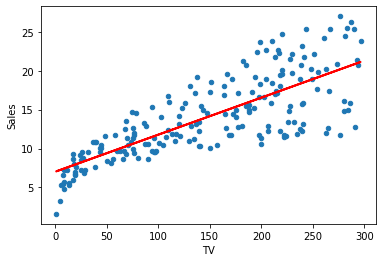

In [ ]:
# Сначала выведем истинные данные
data.plot(kind='scatter', x='TV', y='Sales')

# Теперь рисуем нашу линию
plt.plot(x, y_pred, c='red', linewidth=2)
plt.show()

Посчитаем ошибку MSE на обучающей выборке:


In [ ]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_pred, y))

10.512652915656757


In [ ]:
reg = LinearRegression()

X = data.drop("Sales", axis=1)
y = data["Sales"]

# Обучаем нашу модель
reg.fit(X, y)

# Коэффициенты
print("Сдвиг = {}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {} = {}".format(column, coef))

Сдвиг = 2.938889369459412
Коэффициент для TV = 0.0457646454553976
Коэффициент для Radio = 0.18853001691820448
Коэффициент для Newspaper = -0.0010374930424763285


In [ ]:
y_pred = reg.predict(X)

# Ошибка теперь равна:
print(mean_squared_error(y_pred, y))

2.784126314510936


In [ ]:
# Многие выбирают k=5 для начала
k = 5
errors = []

X = data.drop("Sales", axis=1)
y = data["Sales"]

# Размер одной части
fold_size = len(X) // k


for i in range(k):
    # Берём все значения, кроме выбранной части
    X_train = X[:i * fold_size].append(X[(i + 1) * fold_size:])
    y_train = y[:i * fold_size].append(y[(i + 1) * fold_size:])

    # Берём выбранную часть
    X_test = X[i * fold_size:(i + 1) * fold_size]
    y_test = y[i * fold_size:(i + 1) * fold_size]

    # На каждой итерации обучаемся отдельно и сохраняем ошибку
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    errors.append(mean_squared_error(y_pred, y_test))

# Выводим ошибку на кросс-валидации
print(np.mean(errors))

3.0729465971002106


In [ ]:
# А можно не париться и попросить sklearn всё сделать за нас
from sklearn.model_selection import cross_val_score

# Берём с отрицательным знаком, т.к. обычно туда передаётся не функция потерь, которую надо минимизировать
# А что-то вроде "функции успеха", которую надо максимизировать
errors = -cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
print(np.mean(errors))

In [ ]:
# L1
from sklearn.linear_model import Lasso

reg = Lasso().fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

errors = -cross_val_score(Lasso(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.mean(errors)))

Сдвиг=3.040215583480375
Коэффициент для TV=0.045661415380019485
Коэффициент для Radio=0.1834643975886825
Коэффициент для Newspaper=0.0

Результат=3.041405896751369


In [ ]:
# L2
from sklearn.linear_model import Ridge

reg = Ridge().fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг = {}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {} = {}".format(column, coef))
print()

errors = -cross_val_score(Ridge(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.mean(errors)))

Сдвиг = 2.9389674583301506
Коэффициент для TV = 0.045764643658018474
Коэффициент для Radio = 0.18852509681078544
Коэффициент для Newspaper = -0.0010362939589070004

Результат=3.072932673298496


In [ ]:
reg.coef_

array([ 0.04576464,  0.1885251 , -0.00103629])

In [ ]:
lambdas = np.arange(0.1, 5.0, 0.2)
# Выведем доступные lambda
print("Все лямбды:")
print(lambdas)

# Лямбды и их ошибки на обучающей выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Lasso(alpha=val).fit(X, y)
    y_pred = reg.predict(X)
    # Сохраняем ошибку на обучающей выборке
    lambda_errors.append((val, mean_squared_error(y_pred, y)))
    print(((val, mean_squared_error(y_pred, y))))

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

# Вычислим ошибку на кросс-валидации
# Лучшая модель
best_reg = Lasso(alpha=min_val)
cv_error = -np.mean(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5
 3.7 3.9 4.1 4.3 4.5 4.7 4.9]
(0.1, 2.7842286851696865)
(0.30000000000000004, 2.784985993046452)
(0.5000000000000001, 2.7857256993570276)
(0.7000000000000001, 2.7868352725638887)
(0.9000000000000001, 2.7883147049707757)
(1.1000000000000003, 2.7901639965776877)
(1.3000000000000003, 2.7923831473846246)
(1.5000000000000004, 2.7949721573915873)
(1.7000000000000004, 2.7979310265985737)
(1.9000000000000004, 2.801259755005587)
(2.1000000000000005, 2.804958342612624)
(2.3000000000000007, 2.8090267894196854)
(2.5000000000000004, 2.813465095426774)
(2.7000000000000006, 2.8182732606338856)
(2.900000000000001, 2.8234512850410236)
(3.1000000000000005, 2.8289991686481857)
(3.3000000000000007, 2.8349169114553736)
(3.500000000000001, 2.841204513462586)
(3.7000000000000006, 2.8478619746698244)
(3.900000000000001, 2.8548892950770868)
(4.1000000000000005, 2.8622864746843755)
(4.300000000000001, 2.8700535134916887)
(4.500

In [ ]:
lambdas = np.arange(0.1, 5.0, 0.2)
# Выведем доступные lambda
print("Все лямбды:")
print(lambdas)

# Лямбды и их ошибки на кросс-валидации
lambda_errors = []
# Проходим по всем лямбдам и записываем ошибки на кросс-валидации
for val in lambdas:
    reg = Lasso(alpha=val).fit(X, y)
    y_pred = reg.predict(X)
    # Сохраняем ошибку на кросс-валидации
    lambda_errors.append((val,
                          -np.mean(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))))
    print(((val, -np.mean(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error')))))

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

# Лучшая модель
best_reg = Lasso(alpha=min_val)
cv_error = -np.mean(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5
 3.7 3.9 4.1 4.3 4.5 4.7 4.9]
(0.1, 3.069021973303406)
(0.30000000000000004, 3.069021973303406)
(0.5000000000000001, 3.069021973303406)
(0.7000000000000001, 3.069021973303406)
(0.9000000000000001, 3.069021973303406)
(1.1000000000000003, 3.069021973303406)
(1.3000000000000003, 3.069021973303406)
(1.5000000000000004, 3.069021973303406)
(1.7000000000000004, 3.069021973303406)
(1.9000000000000004, 3.069021973303406)
(2.1000000000000005, 3.069021973303406)
(2.3000000000000007, 3.069021973303406)
(2.5000000000000004, 3.069021973303406)
(2.7000000000000006, 3.069021973303406)
(2.900000000000001, 3.069021973303406)
(3.1000000000000005, 3.069021973303406)
(3.3000000000000007, 3.069021973303406)
(3.500000000000001, 3.069021973303406)
(3.7000000000000006, 3.069021973303406)
(3.900000000000001, 3.069021973303406)
(4.1000000000000005, 3.069021973303406)
(4.300000000000001, 3.069021973303406)
(4.500000000000001, 3.0

(3.1000000000000005, 3.290348249347417)


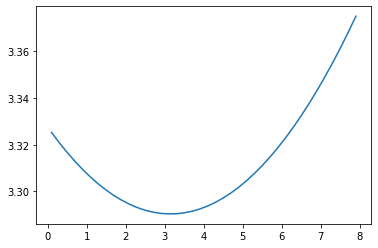

In [ ]:
### ваш код здесь
from sklearn.model_selection import train_test_split

np.random.seed(2)
lambdas = np.arange(0.1, 8, 0.2)
lambda_test_errors = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

for val in lambdas:
    reg = Lasso(alpha=val).fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    lambda_test_errors.append((val, mean_squared_error(y_pred, y_test)))

print(min(lambda_test_errors, key=lambda x: x[1]))
errors = [lambda_test_errors[i][1] for i in range(len(lambda_test_errors))]
plt.plot(lambdas, errors)

Ошибка минимальна при 𝜆 = 3.1

(0.1, 1.9918966600350878)


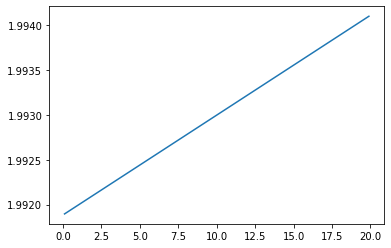

In [ ]:
### ваш код здесь
np.random.seed(1)
lambdas = np.arange(0.1, 20.0, 0.2)
lambda_test_errors = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
for val in lambdas:
    reg = Ridge(alpha=val).fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    lambda_test_errors.append((val, mean_squared_error(y_pred, y_test)))

print(min(lambda_test_errors, key=lambda x: x[1]))
errors = [lambda_test_errors[i][1] for i in range(len(lambda_test_errors))]
plt.plot(lambdas, errors)

Ошибка минимальна при 𝜆 = 0.1

In [ ]:
# https://drive.google.com/file/d/1dXl0DeoYG1mkXya6mDpaY0NhbcbI17Nu/view?usp=sharing
!gdown --id 1dXl0DeoYG1mkXya6mDpaY0NhbcbI17Nu

Downloading...
From: https://drive.google.com/uc?id=1dXl0DeoYG1mkXya6mDpaY0NhbcbI17Nu
To: /content/diabetes.data.csv
100% 18.5k/18.5k [00:00<00:00, 36.5MB/s]


In [ ]:
data = pd.read_csv('diabetes.data.csv', sep='\t')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [ ]:
target = 'Y'
X = data.drop([target], axis=1)
y = data[target]

X.shape, y.shape

((442, 10), (442,))

In [ ]:
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


In [ ]:
X.columns.tolist()

['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

In [ ]:
# посмотрим, сколько пропусков в каждой колонке
for column in X.columns:
    print(f'{column}: {X[column].isna().sum()}')

AGE: 0
SEX: 0
BMI: 0
BP: 0
S1: 0
S2: 0
S3: 0
S4: 0
S5: 0
S6: 0


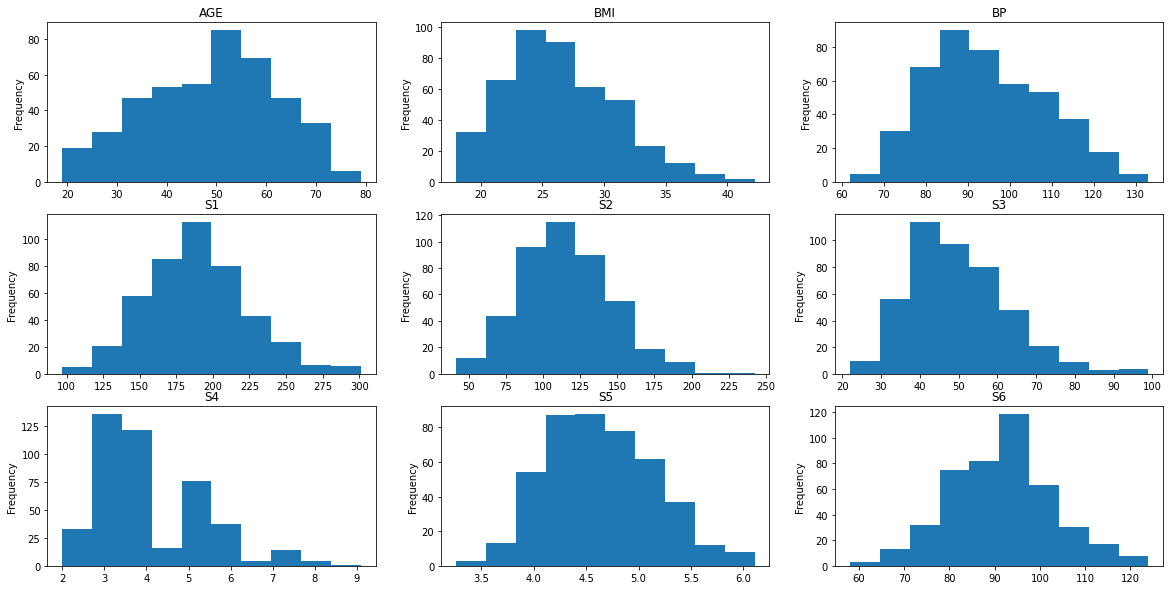

In [ ]:
fig, axs = plt.subplots(3, 3)
for i, column in enumerate(X.drop(['SEX'], axis=1).columns):
    X[column].plot(kind='hist', x=column, ax=axs[i // 3][i % 3], figsize=(20, 10), title=column)

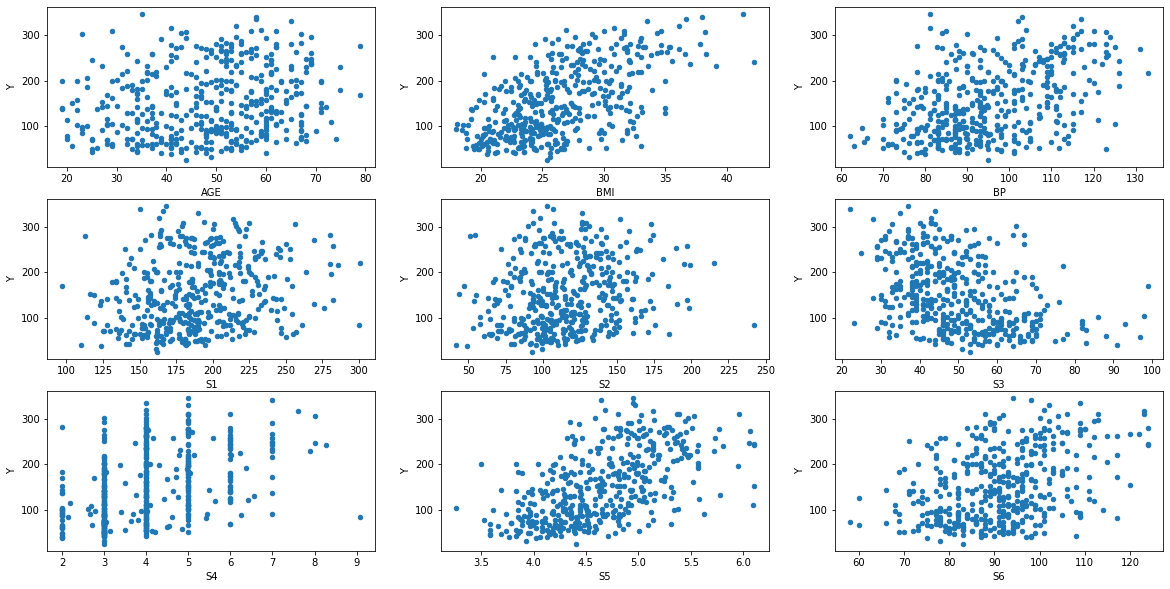

In [ ]:
fig, axs = plt.subplots(3, 3)
for i, column in enumerate(X.drop(['SEX'], axis=1).columns):
    data.plot(kind='scatter', x=column, y='Y', ax=axs[i // 3][i % 3], figsize=(20, 10))

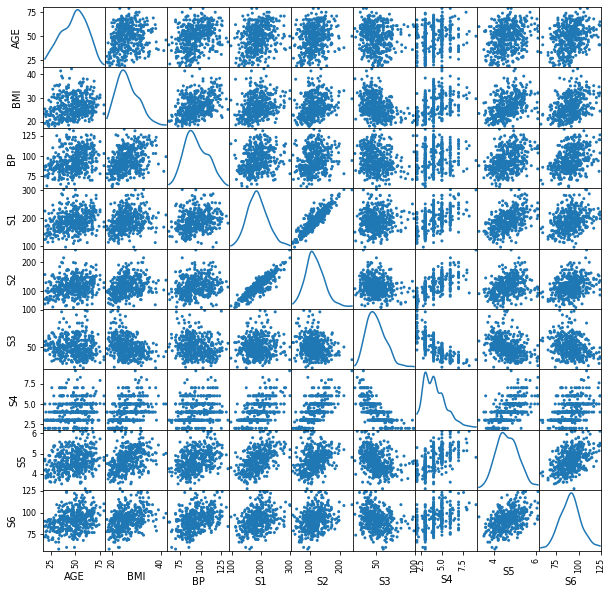

In [ ]:
from pandas.plotting import scatter_matrix

# S1 и S2 имеют линейную зависимость
fig = scatter_matrix(X.drop('SEX', axis=1), alpha = 1, figsize = (10, 10), diagonal = 'kde')

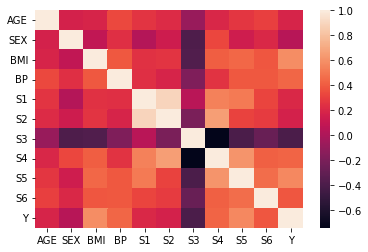

In [ ]:
sns.heatmap(data.corr())
# присутствует мультикорреляция, что не есть хорошо, можно попробовать удалить коррелирующие фичи

In [ ]:
px.pie(X, names='SEX')

In [ ]:
pipe = Pipeline([('norm', StandardScaler()),
                 ('model', Ridge())])

In [ ]:
def new_features(X, y, pipe, n = 5):
    '''Функция добавляет в датасет n новых лучших фичей, получаемых из уже имеющихся и
    отбираемых на основе
    значения кросс-валидации'''
    ers = []
    my_X = X.copy()
    for i in range(n):
        ers = []
        for column1 in my_X.columns.tolist():
            for column2 in my_X.columns.tolist():
                my_X['s'] = my_X[column1] * my_X[column2]
                error = np.mean(-cross_val_score(pipe, my_X, y, cv=5, scoring='neg_mean_squared_error'))
                ers.append((column1, column2, error))
                my_X = my_X.drop('s', axis=1)
        res = min(ers, key=lambda x: x[2])
        print(res)
        my_X[res[0] + '/' + res[1]] = my_X[res[0]] * my_X[res[1]]
    error = np.mean(-cross_val_score(pipe, my_X, y, cv=5, scoring='neg_mean_squared_error'))
    print(error)
    return my_X

In [ ]:
def del_features(X, y, pipe):
    """Функция выводит метрику на кросс-валидации при удалении каждой из фичей"""
    my_X = X.copy()
    ers = []
    for column in X.columns.tolist():
        t_X = my_X.drop(column, axis=1)
        error = np.mean(-cross_val_score(pipe, t_X, y, cv=5, scoring='neg_mean_squared_error'))
        ers.append((column, error))
    print(sorted(ers, key=lambda x: x[1]))

In [ ]:
X_n = new_features(X, y, pipe, 20) # формируем новые фичи

('AGE', 'SEX', 2916.9191597027793)
('BMI', 'BP', 2866.9068904107676)
('S6', 'S6', 2830.9430302762257)
('S2', 'S5', 2817.456303839076)
('AGE/SEX', 'BMI/BP', 2806.7452816248942)
('S3', 'AGE/SEX/BMI/BP', 2789.8978985079693)
('S1', 'S3', 2780.533285295582)
('S4', 'S6/S6', 2770.4463764534134)
('BP', 'S6', 2763.0765944174386)
('S5', 'S3/AGE/SEX/BMI/BP', 2756.368906657384)
('SEX', 'S5', 2749.4335358677986)
('AGE', 'BMI', 2743.87719885392)
('AGE/SEX', 'S1/S3', 2739.06218023002)
('S3', 'S4', 2735.064182088402)
('S5', 'S5/S3/AGE/SEX/BMI/BP', 2729.6206725153743)
('SEX', 'S3', 2724.437433466783)
('S4/S6/S6', 'S4/S6/S6', 2719.585330718415)
('S4', 'S4/S6/S6/S4/S6/S6', 2708.441128116437)
('S4', 'S4/S4/S6/S6/S4/S6/S6', 2703.23461266617)
('BP/S6', 'BP/S6', 2699.176048595894)
2699.176048595894


In [ ]:
X_n.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,AGE/SEX,BMI/BP,S6/S6,S2/S5,AGE/SEX/BMI/BP,S3/AGE/SEX/BMI/BP,S1/S3,S4/S6/S6,BP/S6,S5/S3/AGE/SEX/BMI/BP,SEX/S5,AGE/BMI,AGE/SEX/S1/S3,S3/S4,S5/S5/S3/AGE/SEX/BMI/BP,SEX/S3,S4/S6/S6/S4/S6/S6,S4/S4/S6/S6/S4/S6/S6,S4/S4/S4/S6/S6/S4/S6/S6,BP/S6/BP/S6
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,118,3242.1,7569,452.93336,382567.8,14537576.4,5966.0,30276.0,8787.0,7.064971e+07,9.7196,1893.9,703988.0,152.0,3.433435e+08,76.0,9.166362e+08,3.666545e+09,1.466618e+10,77211369.0
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,48,1879.2,4761,401.63376,90201.6,6314112.0,12810.0,14283.0,6003.0,2.457326e+07,3.8918,1036.8,614880.0,210.0,9.563422e+07,70.0,2.040041e+08,6.120123e+08,1.836037e+09,36036009.0
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,144,2836.5,7225,437.37408,408456.0,16746696.0,6396.0,28900.0,7905.0,7.825396e+07,9.3456,2196.0,921024.0,164.0,3.656651e+08,82.0,8.352100e+08,3.340840e+09,1.336336e+10,62489025.0
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,24,2125.2,7921,642.58542,51004.8,2040192.0,7920.0,39605.0,7476.0,9.977151e+06,4.8903,607.2,190080.0,200.0,4.879126e+07,40.0,1.568556e+09,7.842780e+09,3.921390e+10,55890576.0
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,50,2323.0,6400,538.02870,116150.0,6039800.0,9984.0,25600.0,8080.0,2.591376e+07,4.2905,1150.0,499200.0,208.0,1.111830e+08,52.0,6.553600e+08,2.621440e+09,1.048576e+10,65286400.0


In [ ]:
del_features(X_n, y, pipe)

[('BMI', 2694.0268279274337), ('AGE', 2694.6916407634326), ('S3/AGE/SEX/BMI/BP', 2695.511211500844), ('BP', 2695.525528036046), ('AGE/SEX/BMI/BP', 2697.287733979584), ('S4', 2697.696162996596), ('S6', 2697.847563816648), ('S4/S6/S6', 2698.1607291816313), ('S2', 2698.2968226439807), ('SEX', 2698.371008200974), ('S5/S3/AGE/SEX/BMI/BP', 2698.782113297671), ('S4/S4/S6/S6/S4/S6/S6', 2699.2633908753432), ('S6/S6', 2699.272062955051), ('BP/S6', 2699.353513047621), ('S4/S6/S6/S4/S6/S6', 2699.8660907004532), ('AGE/SEX', 2700.730466495909), ('S3', 2702.3885288201996), ('BP/S6/BP/S6', 2703.23461266617), ('S5/S5/S3/AGE/SEX/BMI/BP', 2704.3243333199803), ('S4/S4/S4/S6/S6/S4/S6/S6', 2704.9925071707944), ('SEX/S3', 2707.4719060095267), ('S2/S5', 2707.931062376623), ('AGE/BMI', 2709.493537947319), ('AGE/SEX/S1/S3', 2713.1132593784087), ('SEX/S5', 2714.77489130322), ('S1/S3', 2717.437766178932), ('S3/S4', 2719.878028343909), ('S5', 2722.5530021403397), ('BMI/BP', 2722.968844937215), ('S1', 2763.62107430

In [ ]:
X_n_upd = X_n.drop(['BMI', 'AGE'], axis=1)

In [ ]:
error = np.mean(-cross_val_score(pipe, X_n_upd, y, cv=5, scoring='neg_mean_squared_error'))
print(error)

2690.2016399204017


Таким образом, с помощью нормализации данных, добавления новых и удаления старых признаков, удалось улучшить результат на кросс-валидации